# Analysis of Location, Remote, and Experience

In [1]:
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
%run utils.ipynb

## Load data

In [2]:
path = 'D:/Learn/projects/data/job_data/apify'
date = '01152025'
type = 'fin'
df = pd.read_csv(f'{path}/{date}_linkedin_{type}_ai_salary.csv')
print(df.shape)
df.head()

(661, 29)


,title,companyName,salary,location,applyUrl,contractType,description,experienceLevel,jobUrl,publishedAt,...,max_hourly_salary,min_yearly_salary,max_yearly_salary,required_degree,prefered_degree,is_remote,required_skills,preferred_degree,avg_hourly_salary,avg_yearly_salary
0,"Financial Director, Private Equity",Atlantic Group,"$200,000.00/yr - $250,000.00/yr","New York, United States",https://www.linkedin.com/jobs/view/financial-d...,Full-time,"Our Client, A top tier PE firm is looking to h...",Executive,https://www.linkedin.com/jobs/view/financial-d...,2025-01-16,...,NaN,200000.0,250000.0,BS,MS,not remote,"['finance', 'accounting', 'GAAP', 'financial r...",NaN,NaN,225000.0
1,Sr Manager of Strategic Finance,Palo Alto Networks,NaN,"Santa Clara, CA",https://www.linkedin.com/jobs/view/sr-manager-...,Full-time,Our Mission\n\nAt Palo Alto Networks® everythi...,Mid-Senior level,https://www.linkedin.com/jobs/view/sr-manager-...,2025-01-16,...,NaN,140000.0,226500.0,BS,MBA,not remote,"['analytical', 'financial modeling', 'Excel', ...",NaN,NaN,183250.0
2,Chief Financial Officer,"Piping Technology & Products, Inc.",NaN,"Houston, TX",https://www.linkedin.com/jobs/view/chief-finan...,Full-time,Company Overview\n\nPiping Technology & Produc...,Executive,https://www.linkedin.com/jobs/view/chief-finan...,2025-01-16,...,NaN,NaN,NaN,NaN,NaN,not remote,"['financial leadership', 'ERP systems', 'chang...",NaN,NaN,NaN
3,Chief Financial Officer,LHH,"$190,000.00/yr - $210,000.00/yr",New York City Metropolitan Area,https://www.linkedin.com/jobs/view/chief-finan...,Full-time,We are working with the CEO of a SaaS start-up...,Executive,https://www.linkedin.com/jobs/view/chief-finan...,2025-01-16,...,NaN,190000.0,210000.0,BS,MS,not remote,"['Accounting', 'FP&A', 'Fundraising', 'Modelli...",NaN,NaN,200000.0
4,Chief Financial Officer,National Vision Inc.,NaN,"Upland, CA",https://www.linkedin.com/jobs/view/chief-finan...,Full-time,Company Description\n\nNational Vision is one ...,Not Applicable,https://www.linkedin.com/jobs/view/chief-finan...,2025-01-16,...,NaN,140000.0,161000.0,BS,MS,not remote,"['financial operations', 'regulations', 'compl...",NaN,NaN,150500.0


### Exam data integrity

In [3]:
df.columns

Index(['title', 'companyName', 'salary', 'location', 'applyUrl',
       'contractType', 'description', 'experienceLevel', 'jobUrl',
       'publishedAt', 'sector', 'workType', 'posterFullName',
       'posterProfileUrl', 'companyId', 'companyUrl', 'ai_dict',
       'min_years_of_experience', 'min_hourly_salary', 'max_hourly_salary',
       'min_yearly_salary', 'max_yearly_salary', 'required_degree',
       'prefered_degree', 'is_remote', 'required_skills', 'preferred_degree',
       'avg_hourly_salary', 'avg_yearly_salary'],
      dtype='object')

In [5]:
df = df[['companyName', 'applyUrl', 'experienceLevel', 'location', 'min_years_of_experience', 'required_degree', 'is_remote', 'avg_hourly_salary', 'avg_yearly_salary']].copy()
df.head()

,companyName,applyUrl,experienceLevel,location,min_years_of_experience,required_degree,is_remote,avg_hourly_salary,avg_yearly_salary
0,Atlantic Group,https://www.linkedin.com/jobs/view/financial-d...,Executive,"New York, United States",12.0,BS,not remote,NaN,225000.0
1,Palo Alto Networks,https://www.linkedin.com/jobs/view/sr-manager-...,Mid-Senior level,"Santa Clara, CA",5.0,BS,not remote,NaN,183250.0
2,"Piping Technology & Products, Inc.",https://www.linkedin.com/jobs/view/chief-finan...,Executive,"Houston, TX",10.0,NaN,not remote,NaN,NaN
3,LHH,https://www.linkedin.com/jobs/view/chief-finan...,Executive,New York City Metropolitan Area,8.0,BS,not remote,NaN,200000.0
4,National Vision Inc.,https://www.linkedin.com/jobs/view/chief-finan...,Not Applicable,"Upland, CA",10.0,BS,not remote,NaN,150500.0


In [6]:
df.shape

(661, 9)

## Job Location

### exam unique values and their count

In [7]:
df['location'].value_counts()

location
New York, NY                       56
Atlanta, GA                        18
Dallas, TX                         17
New York City Metropolitan Area    14
Charlotte, NC                      12
                                   ..
Miami Beach, FL                     1
Coon Rapids, MN                     1
Skokie, IL                          1
Vienna, OH                          1
Glenwood Springs, CO                1
Name: count, Length: 322, dtype: int64

When location is just Untied States, the job almost is always remote.
But when the loction is state name + United States, most are hybrid and on-site.
It's difficult and time consuming to adjust these entries so they are excluded from this analysis.

In [8]:
# check if the location is just United State, is it remote work
df[df['location']=='United States'].shape
# df[df['location']=='United States'].to_csv('location_us.csv')

(1, 9)

In [9]:
df[df['location']=='Texas, United States'].shape
# df[df['location']=='Texas, United States'].to_csv('location_us2.csv')

(1, 9)

In [10]:
df[df['location']=='California, United States'].shape
# df[df['location']=='California, United States'].to_csv('location_us3.csv')

(3, 9)

In [11]:
# group the locations and count the quantity
loc_df = df.groupby('location')['location'].size().reset_index(name='count')
loc_df = loc_df.sort_values(by='count', ascending=False)
loc_df.to_csv('sorted_location.csv')

There are some common variations, like Metropolitan Area can be removed. Use the funciton clean_location_names to convert location texts to standardized format

In [12]:
df['cleaned_location'] = clean_location_names(df)

In [13]:
df.to_csv('clean_location.csv')

Rank the top hiring locations

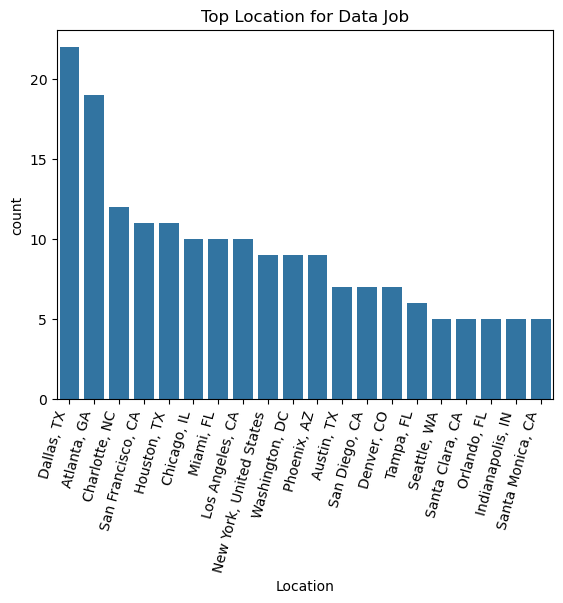

In [14]:
loc_df2 = df.groupby('cleaned_location')['cleaned_location'].size().reset_index(name='count')
loc_df2 = loc_df2.sort_values(by='count', ascending=False)
top_locations = loc_df2[1:21]
# loc_df2.to_csv('sorted_location2.csv')
sns.barplot(data=top_locations, x='cleaned_location', y='count')
plt.title('Top Location for Data Job')
plt.xlabel('Location', )
plt.xticks(rotation=75, ha='right')
plt.show()

New York City has the highest data job in the US, followed by SF, DC, Atlanta, Seattle and Chicago

In [17]:
df.loc[((df['location']=='United States') | (df['is_remote']=='remote')), 'is_remote'] = 'remote'
df.loc[df['is_remote'].isna(), 'remote_work'] = 'not remote'
df['remote_work']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
656    NaN
657    NaN
658    NaN
659    NaN
660    NaN
Name: remote_work, Length: 661, dtype: object

### Remote Job Number and Ratio

In [22]:
remote_ratio = df.groupby('is_remote').size().reset_index(name='count')
remote_ratio

,is_remote,count
0,not remote,592
1,remote,69


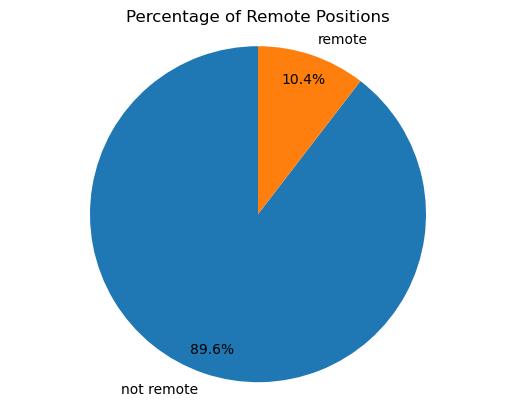

In [23]:
plt.pie(remote_ratio['count'], labels=remote_ratio['is_remote'], autopct='%1.1f%%', labeldistance=1.1, pctdistance=0.85, startangle=90)
plt.axis('equal')
plt.title('Percentage of Remote Positions')
plt.show()

### Distribution of Required Years of Experience

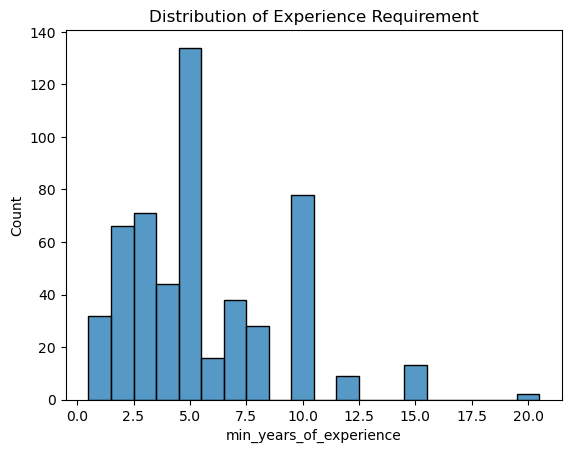

In [24]:
# df['min_years_of_experience']
sns.histplot(df['min_years_of_experience'], discrete=True)
plt.title('Distribution of Experience Requirement')
plt.show()

### Distribution of Required Experience Level

In [26]:
df['experienceLevel'].value_counts()

experienceLevel
Mid-Senior level    275
Director            108
Executive            74
Entry level          73
Not Applicable       67
Associate            61
Internship            3
Name: count, dtype: int64

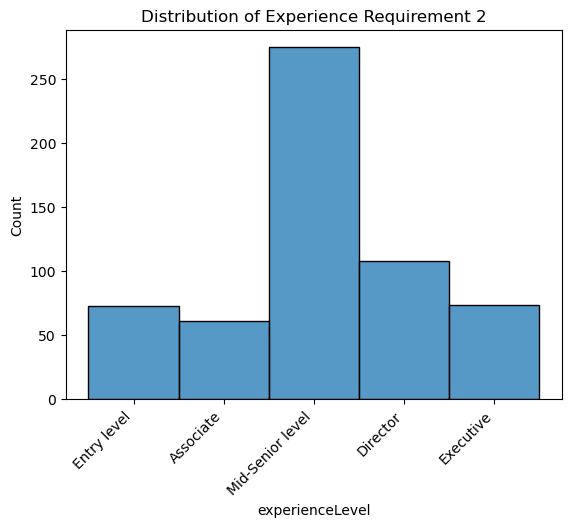

In [29]:
order = ['internship', 'Entry level','Associate','Mid-Senior level', 'Director','Executive']
df['experienceLevel'] = pd.Categorical(df['experienceLevel'], categories=order, ordered=True)
sns.histplot(df['experienceLevel'], discrete=True)
plt.title('Distribution of Experience Requirement 2')
plt.xticks(rotation=45, ha='right')
plt.show()

In [30]:
df.to_csv(f'{path}/{date}_linkedin_{type}_ai_salary_location.csv', index=False)